In [295]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import csv
train = pd.read_csv(r'C:\Users\SooyeonKim\Documents\GitHub\ai\AI analysis\Tytanic\train.csv')
test = pd.read_csv(r'C:\Users\SooyeonKim\Documents\GitHub\ai\AI analysis\Tytanic\test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
submission = pd.read_csv(r'C:\Users\SooyeonKim\Documents\GitHub\ai\AI analysis\Tytanic\submission.csv')
submission.head()
# 예측 값을 survived 에 입력하에 제출한다. 


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [297]:
test.head()

# test에는 목표 변수 Survived  에 대한 데이터가 없다. 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [298]:
# train 데이터 프레임의 통계 정보
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [299]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<AxesSubplot:>

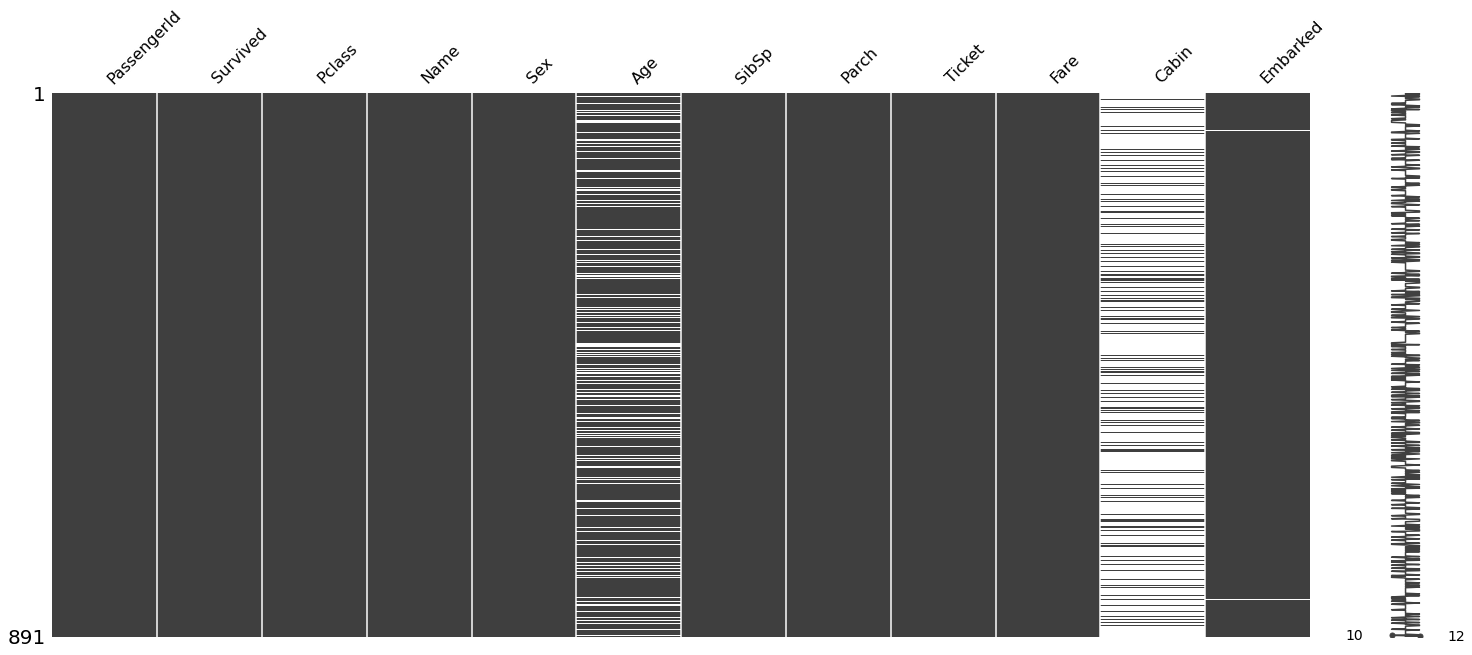

In [300]:
# 결측치 확인
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

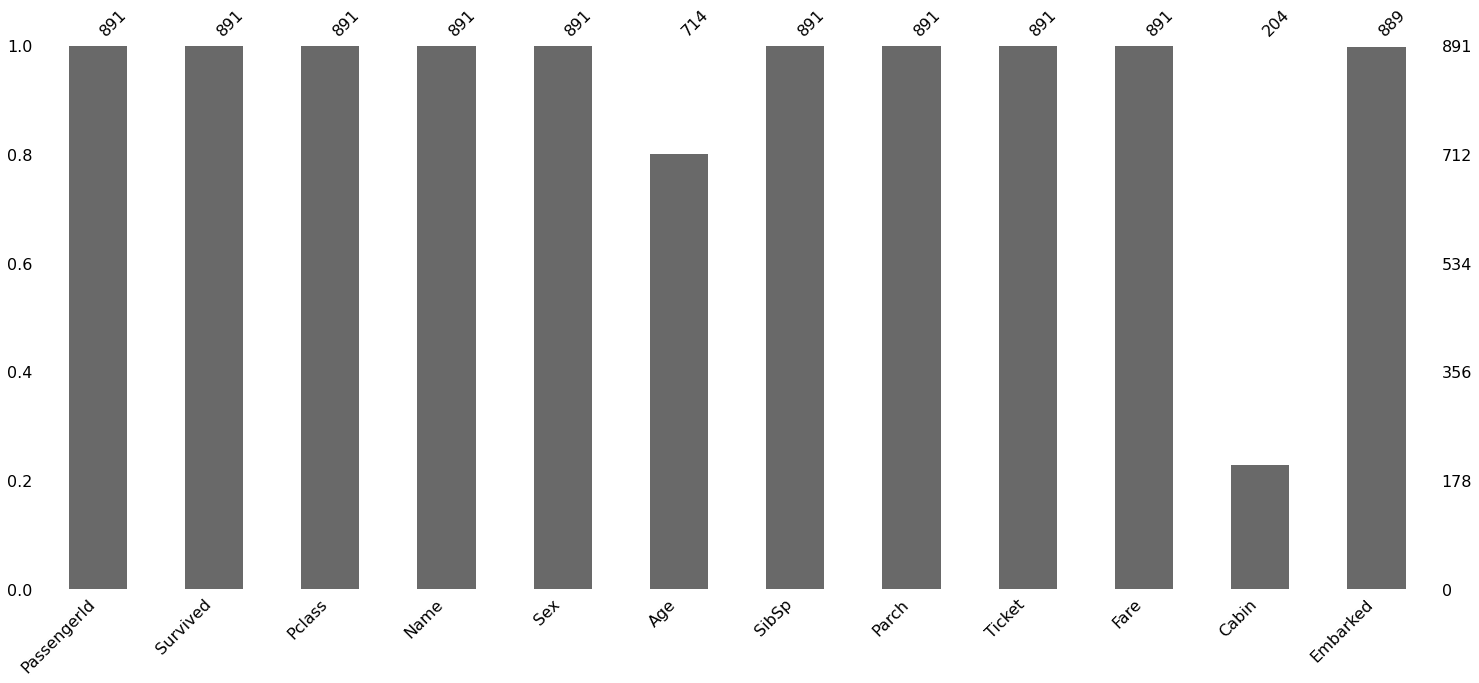

In [301]:
# 결측치 확인
import missingno as msno
msno.bar(train)

In [302]:
# 상관관계 분석
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

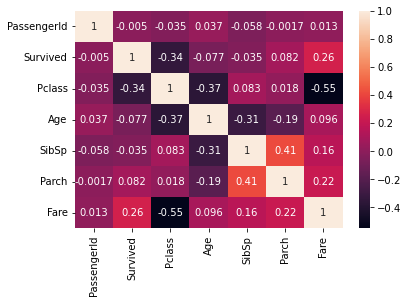

In [303]:
import seaborn as sns
sns.heatmap(train.corr(), annot = True)

# 목표변수 survived 열과 상관관계가 높은 피쳐는 pclass-34% fare 26%dlek.
# 객실 등급과 객실 요금이 강한 상관관계를 보여주고 있다.

In [304]:
# 타이타닉 전체 데이터셋 병합
train ['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'

In [305]:
data = pd.concat([train, test], axis=0)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Test


In [306]:
# 숫자형 피쳐 값들만 추출
data_num = data.loc[:,['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Survived']]
data_num

,Pclass,Age,Sex,SibSp,Parch,Fare,Survived
0,3,22.0,male,1,0,7.2500,0.0
1,1,38.0,female,1,0,71.2833,1.0
2,3,26.0,female,0,0,7.9250,1.0
3,1,35.0,female,1,0,53.1000,1.0
4,3,35.0,male,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,3,NaN,male,0,0,8.0500,NaN
414,1,39.0,female,0,0,108.9000,NaN
415,3,38.5,male,0,0,7.2500,NaN
416,3,NaN,male,0,0,8.0500,NaN


In [331]:
# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())  # 결측치를 나이의 평균으로 처리한다. 
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])  # 결측치를 요금의 최빈값으로 처리한다. 

In [332]:
data_num.isnull().sum()

Pclass        0
Age           0
Sex           0
SibSp         0
Parch         0
Fare          0
Survived    418
dtype: int64

In [308]:
data_num = data.loc[:,['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Survived']]
data_num

,Pclass,Age,Sex,SibSp,Parch,Fare,Survived
0,3,22.0,male,1,0,7.2500,0.0
1,1,38.0,female,1,0,71.2833,1.0
2,3,26.0,female,0,0,7.9250,1.0
3,1,35.0,female,1,0,53.1000,1.0
4,3,35.0,male,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,3,NaN,male,0,0,8.0500,NaN
414,1,39.0,female,0,0,108.9000,NaN
415,3,38.5,male,0,0,7.2500,NaN
416,3,NaN,male,0,0,8.0500,NaN


In [310]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Age       1309 non-null   float64
 2   Sex       1309 non-null   object 
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 81.8+ KB


In [311]:
data_num.isnull().sum()

Pclass        0
Age           0
Sex           0
SibSp         0
Parch         0
Fare          0
Survived    418
dtype: int64

<AxesSubplot:>

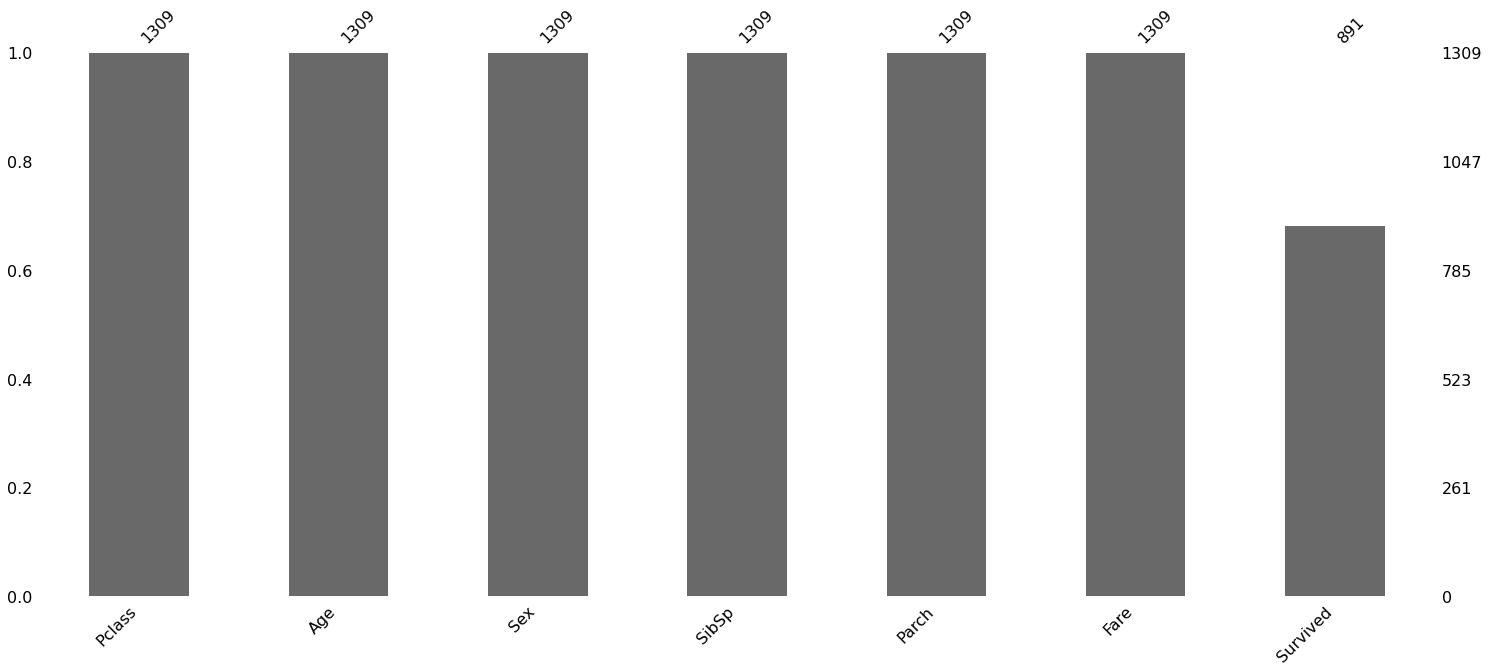

In [312]:
msno.bar(data_num)

In [313]:
# 학습용 데이터와 검증용 데이터로 구분
X_train = data_num.loc[data['TrainSplit']=='Train',['Pclass','Age','SibSp','Parch','Fare']]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

In [314]:
X_test = data_num.loc[data['TrainSplit']=='Test',['Pclass','Age','SibSp','Parch','Fare']]


In [315]:
# 학습 데이터 를 훈련용 80% 검증용 20% 분할한다. 
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle=True, random_state=20)

In [316]:
#피처 엔지니어링
# 모델 성능을 개선할 수 있는 여러가지 방법을 적용해보자

train['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

<AxesSubplot:xlabel='Survived', ylabel='count'>

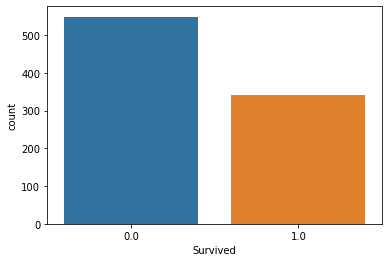

In [318]:
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

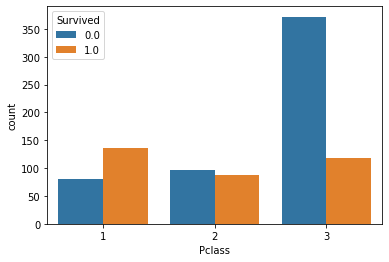

In [319]:
# 객실등급별로
sns.countplot(x = 'Pclass', hue = 'Survived', data=data)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

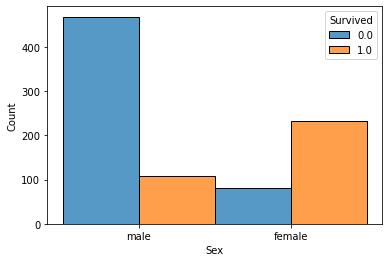

In [320]:
# Sex 성별

sns.histplot(x='Sex', hue='Survived', 
             data=data[data['TrainSplit']=='Train'], multiple='dodge')

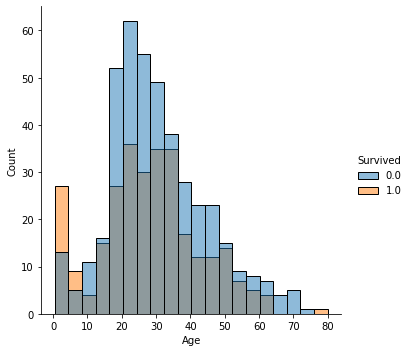

In [321]:
# Age 나이
sns.displot(x = 'Age', hue='Survived', 
             data=data[data['TrainSplit']=='Train'])


In [322]:
# 숫자형 피쳐 값들만 추출
data_num = data.loc[:,['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Survived']]
data_num

,Pclass,Age,Sex,SibSp,Parch,Fare,Survived
0,3,22.0,male,1,0,7.2500,0.0
1,1,38.0,female,1,0,71.2833,1.0
2,3,26.0,female,0,0,7.9250,1.0
3,1,35.0,female,1,0,53.1000,1.0
4,3,35.0,male,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,3,NaN,male,0,0,8.0500,NaN
414,1,39.0,female,0,0,108.9000,NaN
415,3,38.5,male,0,0,7.2500,NaN
416,3,NaN,male,0,0,8.0500,NaN


In [323]:
# 성별 데이터를 숫자로 변경
data_num.loc[data_num['Sex'] == 'female', 'Sex'] = 0 #femaale까지 행, sex는 열
data_num.loc[data_num['Sex'] == 'male', 'Sex'] = 1 #femaale까지 행, sex는 열
data_num['Sex'] = data_num['Sex'].astype(int)
data_num['Sex'].value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [324]:
data_num.corr()

,Pclass,Age,Sex,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.408106,0.124617,0.060832,0.018322,-0.558629,-0.338481
Age,-0.408106,1.000000,0.063645,-0.243699,-0.150917,0.178740,-0.077221
Sex,0.124617,0.063645,1.000000,-0.109609,-0.213125,-0.185523,-0.543351
SibSp,0.060832,-0.243699,-0.109609,1.000000,0.373587,0.160238,-0.035322
Parch,0.018322,-0.150917,-0.213125,0.373587,1.000000,0.221539,0.081629
Fare,-0.558629,0.178740,-0.185523,0.160238,0.221539,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.543351,-0.035322,0.081629,0.257307,1.000000


In [340]:
# 학습용 데이터와 검증용 데이터로 구분

X_train = data_num.loc[data['TrainSplit']=='Train',['Sex', 'Pclass','Age','SibSp','Parch','Fare']]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

X_test = data_num.loc[data['TrainSplit']=='Test',['Sex', 'Pclass','Age','SibSp','Parch','Fare']]

# 학습 데이터 를 훈련용 80% 검증용 20% 분할한다. 
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle=True, random_state=20)

In [341]:
data_num.isnull().sum()

Pclass        0
Age           0
Sex           0
SibSp         0
Parch         0
Fare          0
Survived    418
dtype: int64

In [343]:
from sklearn import neighbors

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 35) 

# 학습
knn.fit(X_tr,y_tr)    
                        
# 예측
y_knn_pred = knn.predict(X_val)                    

# 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_val, y_knn_pred) 
knn_acc


0.7206703910614525

In [345]:
##########################
# 제출용 파일 만들기
##########################

# 예측
y_test_pred = knn.predict(X_test)

# 제출 양식 submission에 정리
submission['Survived'] = y_test_pred.astype(int)

# 제출용 파일 저장
submission.to_csv(r'C:\Users\SooyeonKim\Documents\GitHub\ai\AI analysis\Tytanic\submission.csv', index = False)

